In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Use cifar10 from keras datasets

In [ ]:
# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print('X Train Data Shape:', X_train.shape)
print('y Train Data Shape:', y_train.shape)
print('X Test Data Shape:', X_test.shape)
print('y Test Data Shape:', y_test.shape)

X Train Data Shape: (50000, 32, 32, 3)
y Train Data Shape: (50000, 1)
X Test Data Shape: (10000, 32, 32, 3)
y Test Data Shape: (10000, 1)


# Data Visualization

Visualize 10 examples from each class, in a grid of 10x10 plots

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

0

In [17]:
class_names[np.argmax([0.9, 0.1, 0.1])]

'airplane'

In [18]:
class_names[0]

'airplane'

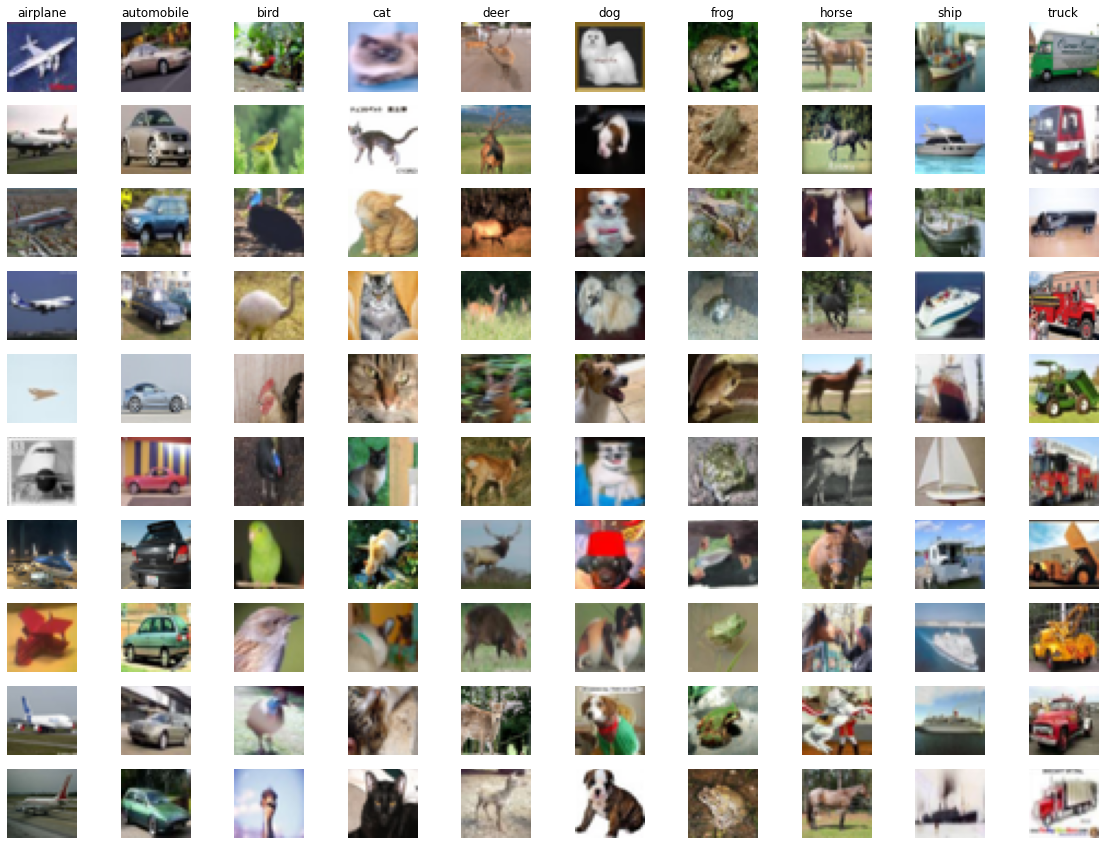

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(20, 15))
for j in range(10):
    for i in range(10):
        images = X_train[np.where(y_train == i)[0]]
        img = images[np.random.choice(images.shape[0])]
        axes[j,i].imshow(img)
        axes[j,i].axis('off')
        if i == 0:
            axes[i,j].set_title(class_names[j])
plt.show()

Plot a histogram of number of examples per class in the training and test sets


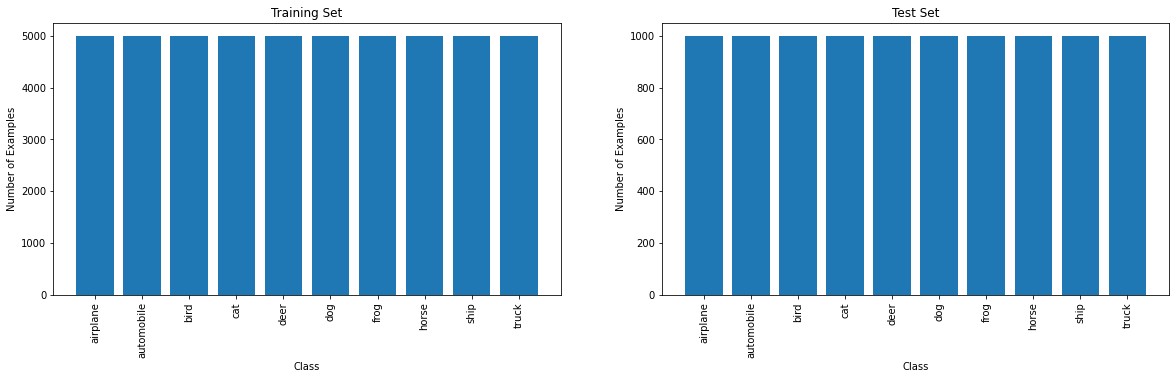

In [ ]:
train_hist, _ = np.histogram(y_train, bins=range(11))
test_hist, _ = np.histogram(y_test, bins=range(11))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.bar(class_names, train_hist)
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Examples')
ax1.set_title('Training Set')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(class_names, test_hist)
ax2.set_xlabel('Class')
ax2.set_ylabel('Number of Examples')
ax2.set_title('Test Set')
ax2.tick_params(axis='x', rotation=90)

plt.show()


# Data Pre-processing

In [ ]:
# copying test images in another variable, as we will use them for predictions
test_imgs = X_test.copy()

In [ ]:
test_imgs.shape

(10000, 32, 32, 3)

In [ ]:
# Flattening images
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

In [ ]:
print("X Train Shape:", X_train.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (50000, 3072)
X Test Shape: (10000, 3072)


In [ ]:
# Normalizing images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [ ]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("y Train Shape:", y_train.shape)
print("y Test Shape:", y_test.shape)

y Train Shape: (50000, 10)
y Test Shape: (10000, 10)


# Modelling

Train and test a model with 3 fully connected layers with the following architecture: 512-256-128


In [ ]:
model = Sequential([
    Dense(512, activation='relu', name = 'Dense_1', input_shape=(32*32*3,)),
    Dense(256, name = 'Dense_2', activation='relu'),
    Dense(128, name = 'Dense_3', activation='relu'),
    Dense(10, name='Output', activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 512)               1573376   
                                                                 
 Dense_2 (Dense)             (None, 256)               131328    
                                                                 
 Dense_3 (Dense)             (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


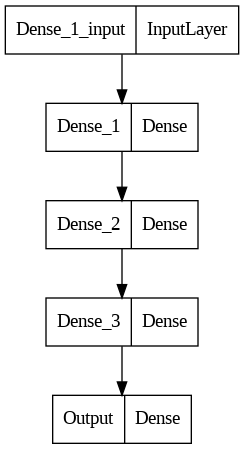

In [ ]:
plot_model(model)

## Training

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.8654 - accuracy: 0.3232 - val_loss: 1.7287 - val_accuracy: 0.3768
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6785 - accuracy: 0.3935 - val_loss: 1.6055 - val_accuracy: 0.4239
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5947 - accuracy: 0.4262 - val_loss: 1.5217 - val_accuracy: 0.4551
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5433 - accuracy: 0.4458 - val_loss: 1.5385 - val_accuracy: 0.4565
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5009 - accuracy: 0.4613 - val_loss: 1.4939 - val_accuracy: 0.4666
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4687 - accuracy: 0.4748 - val_loss: 1.5088 - val_accuracy: 0.4623
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4416 - accuracy: 0.4830 - val_loss: 1.4916 -

## Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.4358 - accuracy: 0.4958
Test Loss: 1.435784101486206
Test Accuracy: 0.4957999885082245


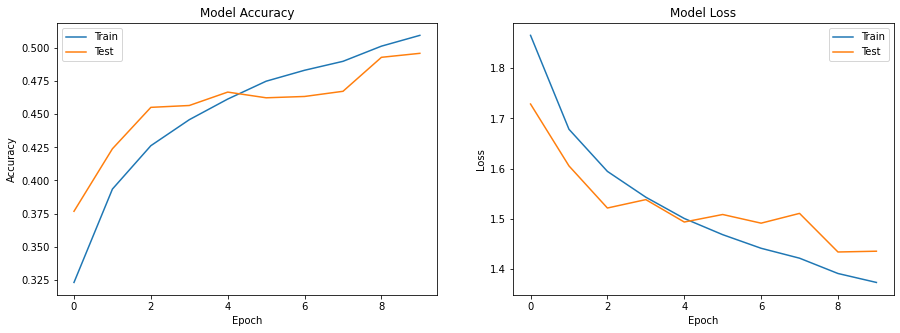

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot accuracy
axs[0].plot(history.history['accuracy'], label='Train')
axs[0].plot(history.history['val_accuracy'], label='Test')
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend()

# plot loss
axs[1].plot(history.history['loss'], label='Train')
axs[1].plot(history.history['val_loss'], label='Test')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()

plt.show()

## Predictions

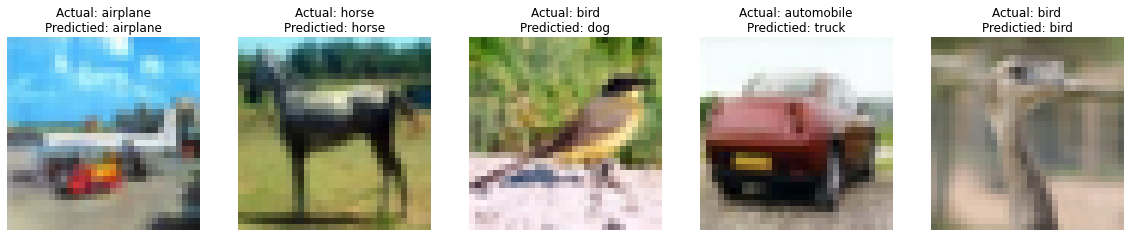

In [ ]:
# We will pick 5 random images from the test set and make predcitions on them

# number of images to predict
n_images = 5

# pick n_images random images from the test set
idxs = np.random.choice(range(len(X_test)), size=n_images, replace=False)
imgs = test_imgs[idxs]
# get labels for images
labels=[class_names[np.argmax(y_test[idx])] for idx in idxs]
#make a prediction for each image
predictions = [class_names[np.argmax(model.predict(img.reshape(-1, 32*32*3), verbose=0))] for img in imgs]

# plotting each image and displaying the actual label and the prediction
fig, axes = plt.subplots(1, n_images, figsize=(20, 5))
for i in range(n_images):
    axes[i].imshow(imgs[i])
    axes[i].set_title('Actual: {}\nPredictied: {}'.format(labels[i], predictions[i]))
    axes[i].axis('off')

plt.show()

In [1]:
import numpy as np

In [14]:
a = np.array([0.9, 0.1, 0.1])
np.argmax(a)

0